In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline
pc.config.cloudy_exe = '/usr/local/Cloudy/c17.01/source/cloudy.exe'

In [3]:
Min = pc.CloudyInput('../models/M2_1')
Min.set_BB(Teff=30000, lumi_unit='ionization parameter', lumi_value=-2)
Min.set_cste_density(0)
Min.set_stop(('zone = 1'))
Min.set_other(('Cosmic Rays Background', 'set dr 0'))
Min.print_input()

In [4]:
Min.model_name = '../models/M2_2'
Min.set_star() # This is needed to reset the SED. Otherwise, this SED is ADDED to the previous one.
Min.set_BB(Teff=50000, lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [5]:
Min.model_name = '../models/M2_3'
Min.set_star()
Min.set_BB(Teff=100000, lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [6]:
Min.model_name = '../models/M2_4'
Min.set_star()
Min.set_BB(Teff=160000, lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [7]:
Min.model_name = '../models/M2_5'
Min.set_star()
Min.set_star(SED = 'table power law', SED_params = '', lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [8]:
Min.model_name = '../models/M2_6'
Min.set_star()
Min.set_star(SED = 'table AGN', SED_params = '', lumi_unit='ionization parameter', lumi_value=-2)
Min.print_input()

In [9]:
pc.run_cloudy(dir_='../models', n_proc=6, use_make=True, model_name='M2_')

In [2]:
Ms = pc.load_models('../models/M2_', read_emis=False)

In [3]:
print(Ms)

[<Cloudy model from ../models/M2_1>, <Cloudy model from ../models/M2_2>, <Cloudy model from ../models/M2_3>, <Cloudy model from ../models/M2_4>, <Cloudy model from ../models/M2_5>, <Cloudy model from ../models/M2_6>]


In [4]:
from pyCloudy.utils.misc import sextract
M = Ms[0]
M.out

{'###First': ' ####  1  Te:5.638E+03 Hden:1.000E+00 Ne:1.100E+00 R:1.000E+30 R-R0:5.000E-01 dR:1.000E+00 NTR: 13 Htot:2.904E-24 T912: 3.72e-21###\n',
 'Blackbody': '                       * Blackbody 30000.000000                                                          *\n',
 'Chem1': '        H :  0.0000  He: -1.0000  Li: -8.6904  Be:-10.5800  B : -9.2097  C : -3.6108  N : -4.0701  O : -3.3098  F : -7.5200\n',
 'Chem2': '        Ne: -4.0000  Na: -5.6696  Mg: -4.4597  Al: -5.5302  Si: -4.4597  P : -6.4949  S : -4.7352  Cl: -6.7190  Ar: -5.6003\n',
 'Chem3': '        K : -6.8794  Ca: -5.6402  Sc: -8.8297  Ti: -6.9788  V : -8.0000  Cr: -6.3298  Mn: -6.5406  Fe: -4.5498  Co: -7.0799\n',
 'Chem4': '                                               Ni: -5.7496  Cu: -7.7905  Zn: -7.4001\n',
 'Cloudy ends': ' Cloudy ends: 1 zone, 1 iteration, 5 cautions. (single thread) ExecTime(s) 8.10\n',
 'SED1': '           I(nu>1ryd):  -2.0851   Average nu:1.258E+00   I( X-ray):   0.0000   I(BalC):  -1.5582

In [13]:
mean_Es = [np.float(sextract(M.out['SED1'], 'Average nu:', 'I(')) for M in Ms]
T0s = [M.T0 for M in Ms]
for mean_E, T0 in zip(mean_Es, T0s):
    print(mean_E,T0)

1.258 5638.5
1.49 6536.7
2.176 11637.0
3.091 15182.0
9.206 17672.0
3.035 12311.0


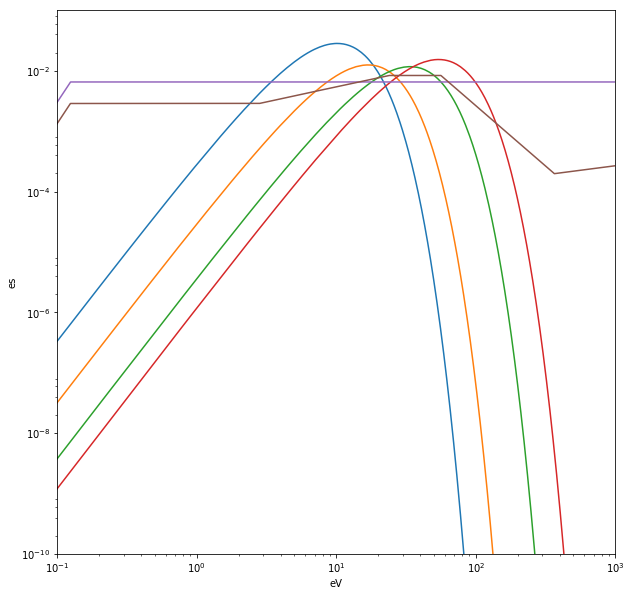

In [11]:
f, ax = plt.subplots(figsize=(10,10))
for M in Ms:
    M.plot_spectrum(ax=ax)
ax.set_xlim((0.1, 1000))
ax.set_ylim((1e-10, 1e-1));

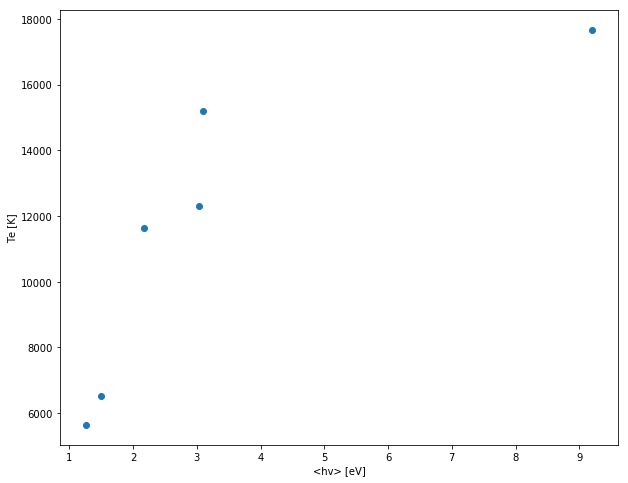

In [15]:
f, ax = plt.subplots(figsize=(10,8))
ax.scatter(mean_Es, T0s)
ax.set_xlabel('<hv> [eV]')
ax.set_ylabel('Te [K]')